# Building an Image Classifier Using the Sequential API

Here will tackle Fashion MNIST, which has the format 70,000 grayscale images of 28 × 28 pixels each, with 10 classes. The images represent several fashion items.

### Using Keras to load the dataset

Let’s load Fashion MNIST:

In [ ]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

 Let’s take a look at the shape and data type of the training set:

In [ ]:
print('Training data shape:', X_train_full.shape)
print('Training data type :', X_train_full.dtype)

Training data shape: (60000, 28, 28)
Training data type : uint8


Based on `X_train_shape`, we have 60.000 image data, and every image is represented as a 28 × 28 array (as a pixel). Moreover, the pixel intensities are represented as integers from 0 to 255 (this refer to color binary value).

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In Fashion MNIST, the labels are number from 0 to 9. It means that the each value represents the specific fashion item. However, we need to make a list of class names to know what are the numbers dealing with. Here is the class names of each number:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

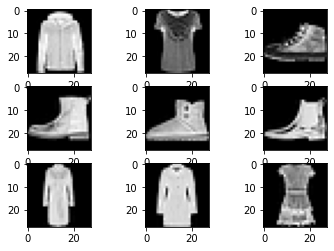

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
class_names[y_train[5]]

'Ankle boot'

### Creating the model using the Sequential API
Now let’s build the neural network! Here is a classification MLP with two hidden
layers:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

model = keras.models.Sequential([Flatten(input_shape=[28, 28]),
                                 Dense(300, activation="relu"),
                                 Dense(100, activation="relu"),
                                 Dense(10, activation="softmax")])

* The first line creates a Sequential model. This is the simplest kind of Keras
model for neural networks that are just composed of a single stack of layers con
nected sequentially. This is called the Sequential API.
* Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes `X.reshape(-1, 1)`. This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the `input_shape`, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `input_shape=[28,28]`.
* Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
* Then we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.
* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

The model’s summary() method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

You can use `keras.utils.plot_model()` to generate an image of your model

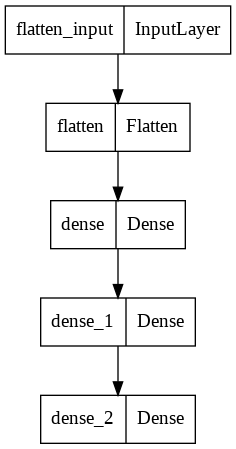

In [ ]:
keras.utils.plot_model(model)

All the parameters of a layer can be accessed using `get_weights()` and
`set_weights()` methods. For a Dense layer, this includes both the connection weights and the bias terms:

In [ ]:
weights, biases = model.layers[1].get_weights()

print('All model weights: ', weights)
print('Weights shape: ', weights.shape)
print('All model biases: ', biases)
print('biases shape: ', biases.shape)

All model weights:  [[ 0.06509964  0.06218611 -0.04294125 ... -0.06324788  0.0416145
   0.01033762]
 [ 0.00273076  0.04166248  0.00079824 ... -0.04216751 -0.05366424
   0.069508  ]
 [ 0.03406369 -0.0593432   0.01904728 ...  0.03396302  0.01330797
   0.03783734]
 ...
 [ 0.04337627  0.02488921 -0.06312938 ... -0.0667007  -0.05485362
  -0.06547754]
 [ 0.05820283 -0.05863632 -0.02133065 ...  0.00915447 -0.02547702
  -0.00211678]
 [ 0.02115539  0.06765017  0.07141063 ...  0.05482279 -0.03210709
   0.06807458]]
Weights shape:  (784, 300)
All model biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

Notice that the Dense layer initialized the connection weights randomly, and the biases were initialized to zeros. 

### Compiling the model

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

* First, we use the `"sparse_categorical_crossentropy"` loss because we have sparse labels, and the classes are exclusive. If we were doing binary classification (with one or more binary labels), then we would use the `"sigmoid"` (i.e., logistic) activation function in the output layer instead of the `"softmax"` activation function, and we would use the `"binary_crossentropy"` loss.

* Regarding the optimizer, `"sgd"` means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm.
* Finally, since this is a classifier, it’s useful to measure its `"accuracy"` during training and evaluation.

### Training and evaluating the model
Now the model is ready to be trained. For this we simply need to call its `fit()`
method:

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7155 - accuracy: 0.7652 - val_loss: 0.5134 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4860 - accuracy: 0.8309 - val_loss: 0.4713 - val_accuracy: 0.8400
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4424 - accuracy: 0.8445 - val_loss: 0.4167 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4152 - accuracy: 0.8547 - val_loss: 0.4196 - val_accuracy: 0.8542
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3952 - accuracy: 0.8606 - val_loss: 0.3807 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3775 - accuracy: 0.8674 - val_loss: 0.3760 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3649 - accuracy: 0.8712 - val_loss: 0.3571 - val_accurac

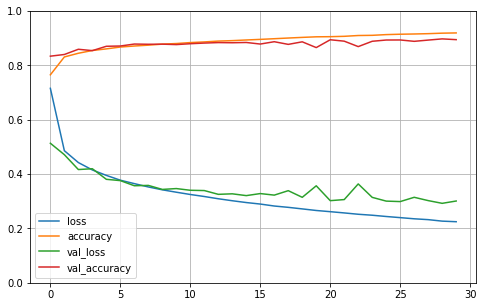

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

You can see that both the training accuracy and the validation accuracy steadily
increase during training, while the training loss and the validation loss decrease. The training accuracy given that about 91.93% while for the validation accuracy was about 89.46%. Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. 

Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the `evaluate()` method (it also supports several other arguments, such as batch_size and
sample_weight)

In [ ]:
 model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 58.9161 - accuracy: 0.8561


[58.916099548339844, 0.8561000227928162]

The evaluation result from test set given that about 85.6% accuracy.

### Using the model to make predictions

Next, we can use the model’s `predict()` method to make predictions on new instances. Since we don’t have actual new instances, we will just use the first three instances of the test set:

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np

y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

As you can see, the prediction for the firs 3 fashion items goes to Ankle boot', 'Pullover', 'Trouser'. Here is the figures of them.

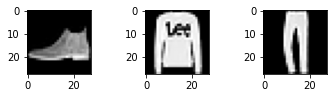

In [ ]:
for i in range(3):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_new[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

The actual labels also say the same things. Means that our prediction is valid.

In [ ]:
 y_new = y_test[:3]
 np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')